In [22]:
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy.fft
import pandas as pd
from PIL import Image
from matplotlib.colors import LogNorm

# Project 1, Numerical Mathematics TMA4215

## Task 1: The (Discrete) Fourier Transform

### a)

Proving that for any $k, h \in \mathbb{Z}$ we have

$$ \langle \text{e}^{2 \pi \text{i} k \cdot}, \text{e}^{2 \pi \text{i} h \cdot} \rangle = 
\begin{cases} 
1, & k = h \\
0, & \text{else} 
\end{cases}. $$

The inner product is given by

$$ \langle \text{e}^{2 \pi \text{i} k x}, \text{e}^{2 \pi \text{i} h x} \rangle = 
\begin{cases} 
1, & k = h \\
0, & \text{else} 
\end{cases} = \int^1_0 \text{e}^{2 \pi \text{i} k x} \overline{\text{e}^{2 \pi \text{i} h x}} dx .$$

The complex conjugate, $\overline{\text{e}^{\text{i}x}} = \text{e}^{-\text{i}x}$, gives

$$ \langle \text{e}^{2 \pi \text{i} k x}, \text{e}^{2 \pi \text{i} h x} \rangle = \int^1_0 \text{e}^{2 \pi \text{i} k x} \text{e}^{-2 \pi \text{i} h x} 
= \int^1_0 \text{e}^{(k-h) 2 \pi \text{i} x}dx .$$

For $k = h$ this equals

$$\int^1_0 \text{e}^0 dx = \int^1_0 dx = 1.$$

For $k \neq h$, with Eulers formula, it equals

$$\int^1_0 (\text{cos}((k - h) 2 \pi x) + \text{i} \text{sin}((k - h) 2 \pi x)) dx 
= \frac{1}{(k - h) 2 \pi} \Big[ \text{sin}((k - h) 2 \pi x) - \text{i} \text{cos}((k - h) 2 \pi x) \Big]^1_0
= \frac{1}{(k - h) 2 \pi} (\text{sin}((k - h) 2 \pi) - \text{i} \text{cos}((k - h) 2 \pi) - (0 - \text{i}))
= \frac{1}{(k - h) 2 \pi} (\text{sin}((k - h) 2 \pi) - \text{i} \text{cos}((k - h) 2 \pi) + \text{i})).$$

Since $(k - h) \in \mathbb{Z}$, 

$$\text{sin}((k - h) 2 \pi) = 0$$

and 

$$\text{cos}((k - h) 2 \pi) = 1.$$

Thus

$$\frac{1}{(k - h) 2 \pi} (\text{sin}((k - h) 2 \pi) - \text{i} \text{cos}((k - h) 2 \pi) + \text{i})) 
= \frac{1}{(k - h) 2 \pi} (0 - \text{i} + \text{i}) = 0 .$$

Then 

$$ \langle \text{e}^{2 \pi \text{i} k \cdot}, \text{e}^{2 \pi \text{i} h \cdot} \rangle = 
\begin{cases} 
1, & k = h \\
0, & \text{else} 
\end{cases} .$$




### b)

Proving that the functions $\sqrt{2} \text{sin}(2 \pi m x), m = 1, 2, ..., \text{cos}(2 \pi 0 x)$ and $\sqrt{2} \text{cos}(2 \pi n x), n = 1, 2, ..., x \in \mathbb{T}$ form an orthonormal system. We have

$$ \langle \sqrt{2} \text{sin}(2 \pi n \cdot), \sqrt{2} \text{cos}(2 \pi m \cdot) \rangle = 0, n \in \{1, 2, ...\}, m \in \{ 0, 1, ... \}$$

$$ \langle \sqrt{2} \text{sin}(2 \pi n \cdot), \sqrt{2} \text{sin}(2 \pi m \cdot) \rangle =
\begin{cases}
0, & m \neq n \\
1, & m = n 
\end{cases}, m,n \in \{ 0, 1, ...\}$$

$$ \langle \sqrt{2} \text{cos}(2 \pi n \cdot), \sqrt{2} \text{cos}(2 \pi m \cdot) \rangle = 
\begin{cases}
0, & m \neq n \\
1, & m = n \neq 0\\
2, & m = n = 0
\end{cases}, m,n \in \{ 0, 1, ...\}$$

The system is orthogonal if $ \langle f_i, f_j \rangle = 0$ for $i \neq j$.

$$ \langle \sqrt{2} \text{sin}(2 \pi m x), \text{cos}(2 \pi 0 x) \rangle 
= \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{1} dx$$

The complex conjugate for $\overline{1} = 1$, so

$$ \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{1} dx = \sqrt{2} \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) dx 
= \sqrt{2} \Big[ - \frac{1}{2 \pi m} \text{cos}(2 \pi m x)\Big]^1_0 
= - \frac{\sqrt{2}}{2 \pi m} (\text{cos}(2 \pi m) - \text{cos}(0))$$

Since $m$ is an integer, $\text{cos}(2 \pi m) = 1$. Thus this inner product equals $0$.

$$ \langle \sqrt{2} \text{sin}(2 \pi m x), \sqrt{2} \text{cos}(2 \pi n x) \rangle 
= \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{\sqrt{2} \text{cos}(2 \pi n x)} dx$$

The complex conjugate for $\overline{\text{cos}(x)} = \text{cos}(\overline{x})$, so

$$\int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{\sqrt{2} \text{cos}(2 \pi n x)} dx 
= 2 \int^1_0 \text{sin}(2 \pi m x) \text{cos}(2 \pi n x) dx $$

Since $m$ and $n$ is an integer, $\text{sin}(2 \pi m x) = 0$ and $\text{cos}(2 \pi n x) = 1$. Thus this inner product also equals $0$. 

$$ \langle \sqrt{2} \text{cos}(2 \pi n x), \text{cos}(2 \pi 0 x) \rangle 
= \int^1_0 \sqrt{2} \text{cos}(2 \pi n x) \overline{1} dx = \sqrt{2} \int^1_0 \sqrt{2} \text{cos}(2 \pi n x) dx
= \sqrt{2} \Big[ \frac{1}{2 \pi n} \text{sin}(2 \pi n x)\Big]^1_0$$

Since $n$ agian is an integer, $\text{sin}(2 \pi n x) = 0$. Thus all the inner products $ \langle f_i, f_j \rangle $ for $i \neq j$ equals $0$. Then it remains to prove that the system is orthonormal. 

The system is orthonormal if $\langle \sqrt{2} \text{sin}(2 \pi m x), \sqrt{2} \text{sin}(2 \pi m x)\rangle = 1$, $ \langle \text{cos}(2 \pi m x), \text{cos}(2 \pi m x)\rangle = 1$ and $\langle \sqrt{2} \text{cos}(2 \pi m x), \sqrt{2} \text{cos}(2 \pi m x)\rangle = 1$.

$$ \langle \sqrt{2} \text{sin}(2 \pi m x), \sqrt{2} \text{sin}(2 \pi m x)\rangle 
= \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{\sqrt{2} \text{sin}(2 \pi m x)} dx $$

The complex conjugate for $\overline{\text{sin}(x)} = \text{sin}(\overline{x})$, so

$$ \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \overline{\sqrt{2} \text{sin}(2 \pi m x)} dx 
= \int^1_0 \sqrt{2} \text{sin}(2 \pi m x) \sqrt{2} \text{sin}(2 \pi m x) dx = 2 \int^1_0 \text{sin}^2 (2 \pi m x) dx 
= 2 (\frac{1}{2} - \frac{\text{sin}(4 \pi m )}{8 \pi m}) = 1 $$

Further

$$ \langle \text{cos}(2 \pi n x),  \text{cos}(2 \pi n x)\rangle = \langle 1, 1 \rangle 
= \int^1_0 1 \times \overline{1} dx = \int^1_0 1 \times 1 dx = \int^1_0 dx = 1$$

And for the last inner product,

$$ \langle \sqrt{2} \text{cos}(2 \pi n x), \sqrt{2} \text{cos}(2 \pi n x)\rangle 
= \int^1_0 \sqrt{2} \text{cos}(2 \pi n x) \overline{\sqrt{2} \text{cos}(2 \pi n x)} dx 
= \int^1_0 \sqrt{2} \text{cos}(2 \pi n x) \sqrt{2} \text{cos}(2 \pi n x) dx = 2 \int^1_0 \text{cos}^2(2 \pi n x) dx$$

When $n = 0$, $\text{cos}^2(2 \pi n x) = 1$. Thus this inner product will equal $2$ and not $1$. If $n \neq 0 $ we can integrate further, 

$$2 \int^1_0 \text{cos}^2(2 \pi n x) dx = \frac{1}{4} (\frac{\text{sin}(4 \pi n)}{\pi n} + 4) = 1$$

Then $\sqrt{2} \text{sin}(2 \pi m x), m = 1, 2, ..., \text{cos}(2 \pi 0 x)$ and $\sqrt{2} \text{cos}(2 \pi n x), n = 1, 2, ..., x \in \mathbb{T}$ do form an orthonormal system.




### c) 

Using the results from a) and b) to find orthonormal bases for the spaces,

$$T_n := \text{span}(\text{e}^{-2 \pi \text{i} n \cdot}, ..., \text{e}^{2 \pi \text{i} n}) 
= \{ f | f(x) = \sum^n_{k = -n} c_k \text{e}^{2 \pi \text{i} k x}, \text{where} c_{-n}, c_{-n + 1}, ..., c_n \in \mathbb{C}\}$$

where $c_k = \overline{c_{-k}}, k = 0, ..., n$, and

$$ S_n 
:= \text{span}(\text{cos}(0 \cdot), \text{cos}(2 \pi \cdot), ..., \text{cos}(2 \pi n \cdot), \text{sin}(2 \pi \cdot), \text{sin}(2 \pi 2 \cdot), ..., \text{sin}(2 \pi n \cdot))) $$
$$ = \{ f | f(x) = \frac{a_0}{2} + \sum^n_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x), \text{where} a_0, a_1, ..., a_n, b_1, ..., b_n \in \mathbb{R} \}$$

Using the Gram-Schmidt process to find these. Starting with $T_n$,

$$ t_1 = \text{e}^{-2 \pi i n \cdot}$$

$$ t_2 
= \text{e}^{(-n + 1) 2 \pi i \cdot} - \frac{\langle \text{e}^{(-n + 1) 2 \pi i \cdot}, \text{e}^{-2 \pi i n \cdot} \rangle}{\langle \text{e}^{-2 \pi i n \cdot}, \text{e}^{-2 \pi i n \cdot} \rangle } \text{e}^{-2 \pi i n \cdot}$$

From a) we know that all inner product with $k \neq h$ equals zero, which means that every vector projection in the Gram-Schmidt process will equal zero. Thus, 

$$ B_{T_n} = \{ \text{e}^{2 \pi \text{i} k \cdot}, k = -n, -n + 1, ..., n \}$$

And for $S_n$,

$$ s_1 = \text{cos}(0 \cdot) $$

$$ s_2 
= \text{cos}(2 \pi \cdot) - \frac{\langle \text{cos}(2 \pi \cdot), \text{cos}(0 \cdot) \rangle}{\langle \text{cos}(0 \cdot), \text{cos}(0 \cdot) \rangle } \text{cos}(2 \pi \cdot) $$

From b) we know that all inner product with $m \neq n$ equals zero, which means that every vector projection in the Gram-Schmidt process will equal zero. For orthonormality, we also know from b) that for $n \neq 0$ we need to multiply with $\sqrt{2}$. Thus, 

$$ B_{S_n} 
= \{ \text{cos}(0 \cdot), \sqrt{2} \text{cos}(2 \pi k \cdot), \sqrt{2} \text{sin}(2 \pi k \cdot), k = 1, 2, ..., n \}$$

Using further Euler´s identity to argue that both spaces are the same, i.e. $T_n = S_n$:

$$ \text{e}^{2 \pi i k \cdot} = \text{cos}(2 \pi k \cdot) + \text{i} \text{sin}(2 \pi k \cdot)$$

Thus, 

$$ T_n := \text{span}(\text{e}^{-2 \pi \text{i} n \cdot}, ..., \text{e}^{2 \pi \text{i} n}) 
= \text{span}(\text{cos}(0 \cdot), \text{cos}(2 \pi \cdot), ..., \text{cos}(2 \pi n \cdot), \text{sin}(2 \pi \cdot), \text{sin}(2 \pi 2 \cdot), ..., \text{sin}(2 \pi n \cdot))) := S_n $$

The dimension of $T_n$ is

$$ \text{dim}(T_n) = 2n + 1$$

The dimension equals the number of vectors in the basis. Then the $2n$ summand comes from $k$ going from $-n$ to $n$, and to include the vector when $k = 0$ we get the $+1$.

### d)

Using the representation of $S_n$ from c) to prove that the Fourier coefficients $a_0, a_1, ..., a_n, b_1, ..., b_n$ of a function $f \in S_n$ can be computed as:

$$ a_k(f) = 2 \langle f, \text{cos}(2 \pi n \cdot) \rangle 
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{cos}(2 \pi n x) dx, n = 0, 1, ... $$

and

$$ b_k(f) = 2 \langle f, \text{sin}(2 \pi n \cdot) \rangle 
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{sin}(2 \pi n x) dx, n = 1, ...$$

The representation of $S_n$ is

$$ f(x) = \frac{a_0}{2} + \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x)$$

Computing the inner products for $a_k(f)$ and $b_k(f)$

$$ a_k(f) = 2 \langle f, \text{cos}(2 \pi n \cdot) \rangle 
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{cos}(2 \pi n x) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2} + \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x)) \text{cos}(2 \pi n x)  dx
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2}\text{cos}(2 \pi n x) + \text{cos}(2 \pi n x)\sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x)) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2}\text{cos}(2 \pi n x) + \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x)\text{cos}(2 \pi n x) + b_k \text{sin}(2 \pi k x)\text{cos}(2 \pi n x)) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \frac{a_0}{2}\text{cos}(2 \pi n x) dx + 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x)\text{cos}(2 \pi n x) dx + 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} b_k \text{sin}(2 \pi k x)\text{cos}(2 \pi n x)) dx $$

$$
= \int^{\frac{1}{2}}_{-\frac{1}{2}} a_0 \text{cos}(2 \pi n x) dx + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} a_k \sqrt{2} \text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) dx + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} b_k \sqrt{2}\text{sin}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x)) dx $$

From b) we know that for $k = n$, $\sqrt{2}\text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) = 1$, and for $k \neq n$, $\sqrt{2}\text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) = 0$. We also know that $\sqrt{2}\text{sin}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x)) = 0$. Thus we can simplify to

$$ a_0 \Big[ \frac{1}{2 \pi n} \text{sin}(2 \pi n x) \Big]^{\frac{1}{2}}_{-\frac{1}{2}} + a_k \int^{\frac{1}{2}}_{-\frac{1}{2}} dx = a_k (\frac{1}{2} + \frac{1}{2}) = a_k(f)$$

The same happens for the inner product for $b_k(f)$ where we end up with

$$ a_0 \Big[ - \frac{1}{2 \pi n} \text{cos}(2 \pi n x) \Big]^{\frac{1}{2}}_{-\frac{1}{2}} + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^n_{k = 1} a_k \sqrt{2} \text{cos}(2 \pi k x) \sqrt{2} \text{sin}(2 \pi n x) dx + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^n_{k = 1} b_k \sqrt{2} \text{sin}(2 \pi k x) \text{sin}(2 \pi n x) dx$$

From b) we know again that $\sqrt{2} \text{cos}(2 \pi k x) \sqrt{2} \text{sin}(2 \pi n x) = 0$, and that when $k = n$, $\sqrt{2} \text{sin}(2 \pi k x) \text{sin}(2 \pi n x) = 1$, and when $k \neq n$, $\sqrt{2} \text{sin}(2 \pi k x) \text{sin}(2 \pi n x) = 0$. Thus this also simplify to $b_k(f)$.

### e) 

Using equidistant points $x_0, ..., x_{N-1}, x_j = \frac{j}{N}, j = 0, ..., N$, for som $N \in \mathbb{N}$ to approximate the integral required for the Fourier coefficients $c_k(f)$ of a function $f$ from 

$$ c_k(f) = \langle f, \text{e}^{2 \pi \text{i} k \cdot} \rangle 
= \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{e}^{-2 \pi \text{i} k x} dx, k = -n, ..., n $$

Using the composite trapezoidal rule to obtain

$$ c_k(f) \approx \hat{f_k} := \frac{1}{N} \sum^{N - 1}_{j = 0} f_j \text{e}^{-2 \pi \text{i} j k /N},$$

where $f_j = f(x_j)$ and $\vec{f} = (f_0, ..., f_{N-1})$.

The composite trapezoidal rule is 

$$ \int^b_a f(x) dx \approx \frac{1}{2} \sum^n_{j = 1} (x_j - x_{j - 1}) \Big[ f(x_{j - 1}) + f(x_j)) \Big]$$

From this rule we get

$$ c_k(f) = \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{e}^{-2 \pi \text{i} k x} dx 
\approx \frac{1}{2} \sum^n_{j = 1} (x_j - x_{j - 1}) \Big[ f(x_{j - 1})\text{e}^{-2 \pi \text{i} k x_{j - 1}} + f(x_j)\text{e}^{-2 \pi \text{i} k x_j}) \Big] 
= \frac{1}{2} \sum^n_{j = 1} (\frac{j}{N} - \frac{j - 1}{N}) \Big[ f_{j - 1}\text{e}^{-2 \pi \text{i} k x_{j - 1}} + f_j\text{e}^{-2 \pi \text{i} k x_j}) \Big] $$
$$
= \frac{1}{2} \sum^n_{j = 1} \frac{1}{N} \Big[ g_{j-1} + g_j \Big] 
= \frac{1}{2N} (g_0 + g_1 + ... + g_{N - 1} + g_1 + g_2 + ... + g_N) 
= \frac{1}{2N} (g_0 + 2g_1 + 2g_2 + ... + 2g_{N - 1} + g_N) $$

Since $f_j$ is periodic, $g_0 = g_N$. Then we have

$$ \frac{1}{N} \sum^{N - 1}_{j = 0} g_j = \frac{1}{N} \sum^{N - 1}_{j = 0} f_j \text{e}^{-2 \pi \text{i} j k /N}, $$

which is what we wanted to obtain. 

Showing further, that the $\hat{f_k}$ are $N$ periodic, that is $\hat{f_k} = \hat{f_{k + N}}$ for all $k \in \mathbb{Z}$:

$$ \hat{f_{k + N}} = \frac{1}{N} \sum^{N - 1}_{j = 0} f_j \text{e}^{-2 \pi \text{i} j (k + N) /N} 
= \frac{1}{N} \sum^{N - 1}_{j = 0} f_j \text{e}^{-2 \pi \text{i} j k/N} \text{e}^{-2 \pi \text{i} j}$$

$\text{e}^{-2 \pi \text{i} j} = 1$, thus $\hat{f_k} = \hat{f_{k + N}}$ for all $k \in \mathbb{Z}$. For the approximation this means we only need to compute $\hat{f_k}$ for one period, since the values repeat for each period. 

### f) 

Proving that 

$$ \frac{1}{N} \sum^{N - 1}_{j = 0} \text{e}^{- 2 \pi i j k/N} = 
\begin{cases} 
1, & k \text{mod}N \equiv 0 \\
0, & \text{else} 
\end{cases}$$

If $k \text{mod}N \equiv 0$, then $\frac{k}{N}$ is a integer, say $n$:

$$ \frac{1}{N} \sum^{N - 1}_{j = 0} \text{e}^{- 2 \pi i j n} = \frac{1}{N} (\text{e}^{- 2 \pi i 0 n} + ... + \text{e}^{- 2 \pi i (N - 1) n}) = \frac{1}{N} (1 + ... + 1) = \frac{1}{N} N = 1$$

If $k \text{mod}N \neq 0$: Let´s write $ \frac{1}{N} \sum^{N - 1}_{j = 0} \text{e}^{- 2 \pi i j k/N} $ as a geometric series

$$ \frac{1}{N} \sum^{N - 1}_{j = 0} \text{e}^{(- 2 \pi i j k/N)^j} $$

The sum of this series is then

$$ S_N = \frac{1}{N} \frac{\text{e}^{(- 2 \pi i j k/N)^N} - 1}{\text{e}^{- 2 \pi i j k/N}} 
= \frac{1}{N} \frac{1 - 1}{\text{e}^{- 2 \pi i j k/N}} = 0 $$

### h)

Writing a function $\text{transform}(f, N, \text{start} = 0.0)$ where $f$ is a function, $N$ is the number of samples and $\text{start}$ state where to start the sampling and returns a vector $\vec{f} = (f_0, ..., f_{N - 1})^T$ of functions values. Computing further, the DFT $\hat{\vec{f}}$ of $\vec{f}$, with $\text{scipy.fft.fft}$:

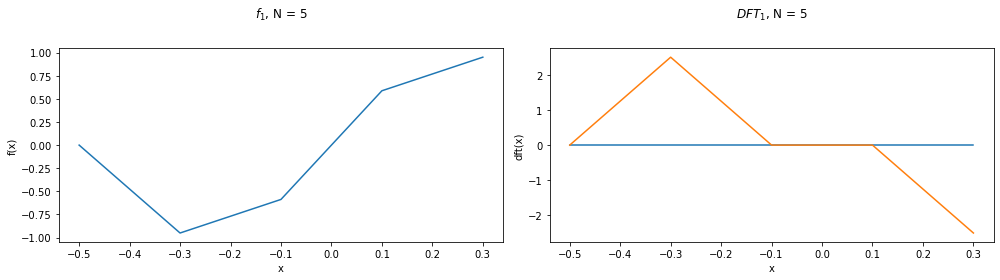

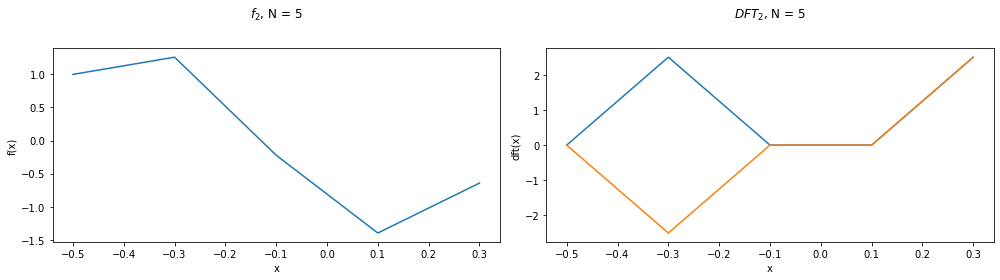

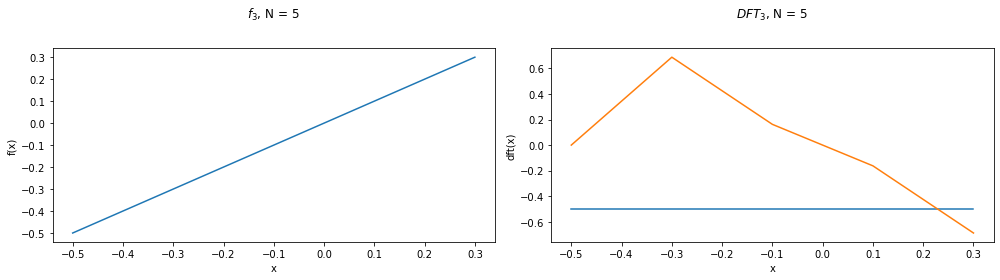

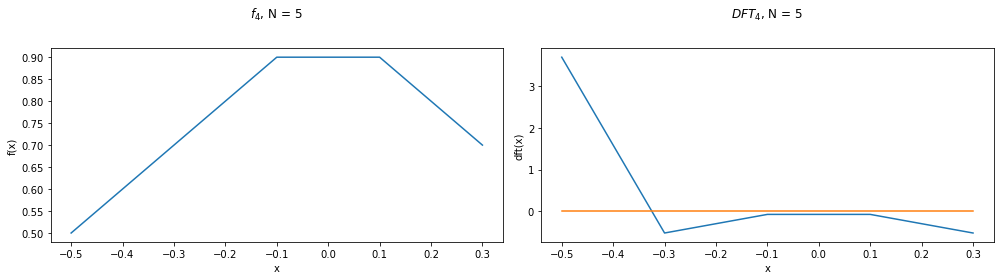

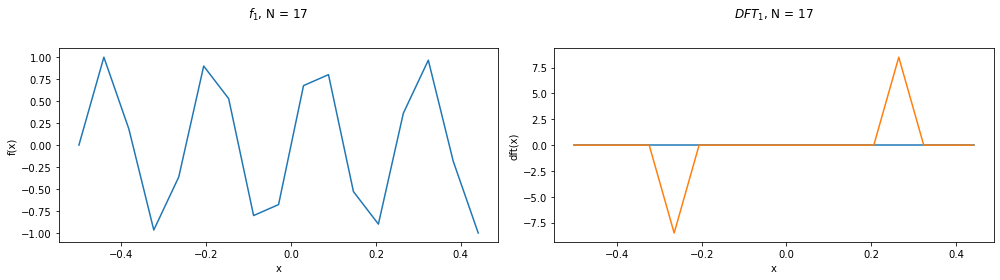

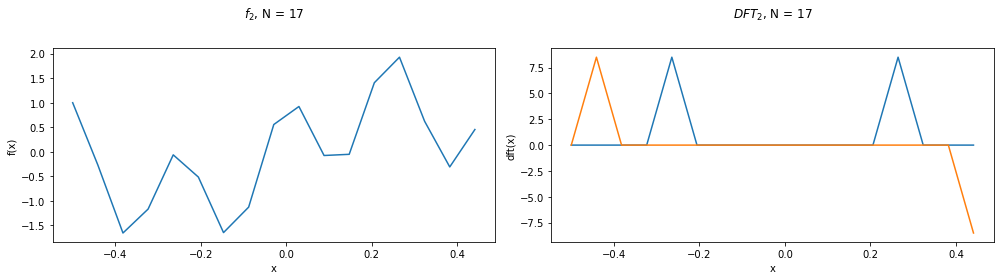

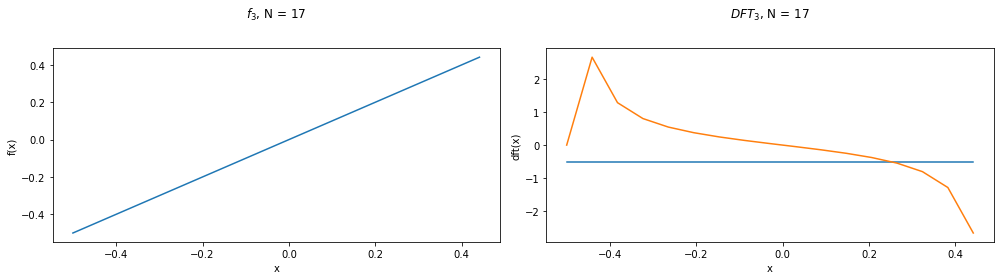

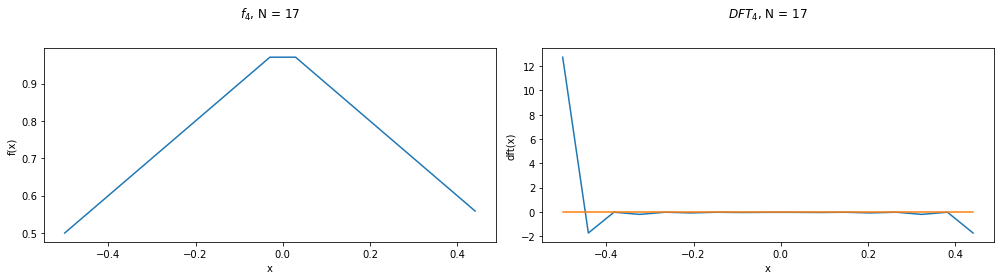

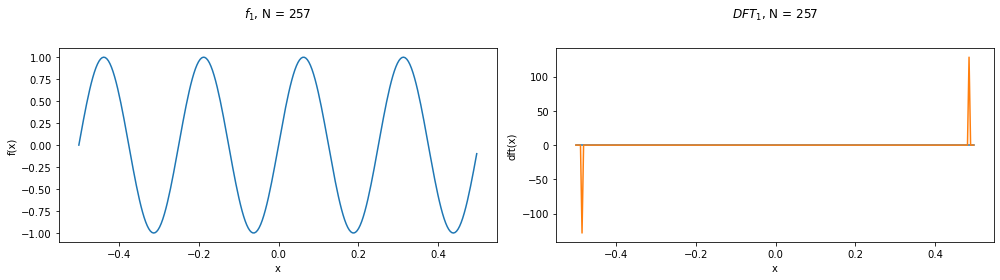

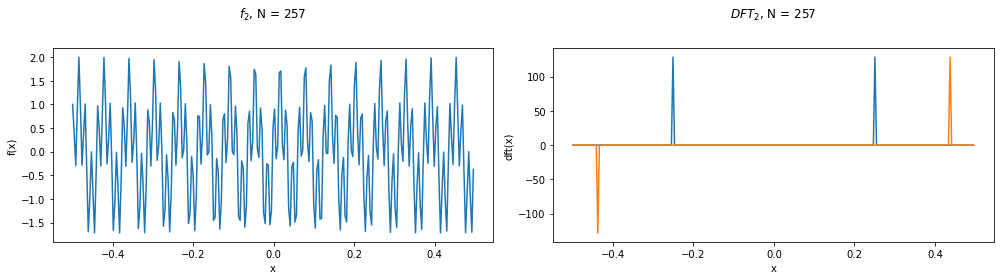

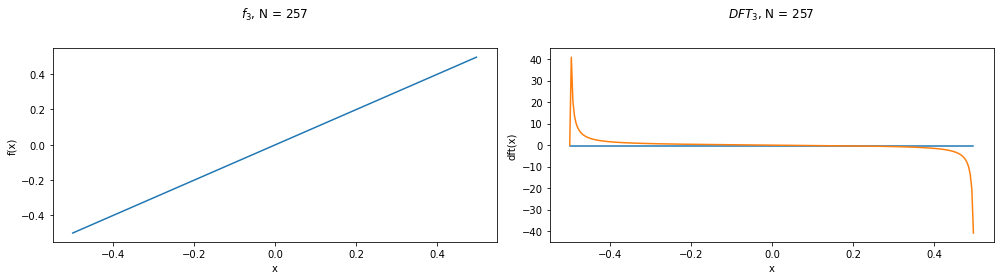

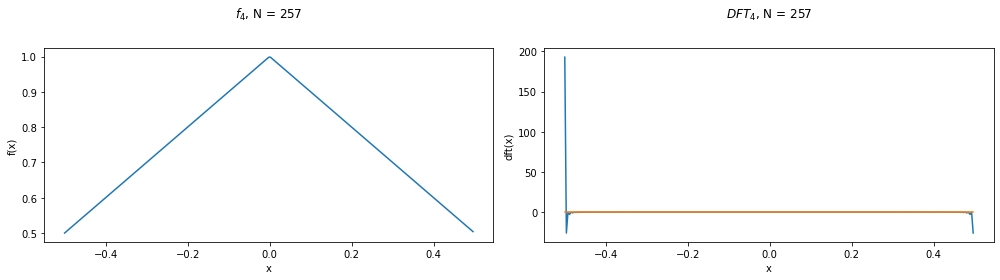

In [23]:
def transform(f, N, start = 0.0):
    """
    Transforming a function to a vector with the function values.
    
    Input:
    f - the function
    N - the number of samples
    start - where to start the sampling
    
    Output:
    f_vec - the vector with function values
    x - the vector with values for x
    """
    f_vec = np.zeros(N)
    x = np.linspace(start, start + 1, N, endpoint = False)
    
    for i in range(N):
        f_vec[i] = f(x[i])
    
    return f_vec, x

def DFT(f_vec):
    """
    Computing the DFT of a vector with function values.
    
    Input:
    f_vec - the vector with function values
    
    Output:
    scipy.fft.fft(f_vec) - the DFT
    """
    return scipy.fft.fft(f_vec)

# Considering the following functions defined on T = [-0.5, 0.5) as periodic functions (by periodic continuation):

def f_1(x):
    """
    Function f_1(x).
    
    Input:
    x - the x value
    
    Output:
    math.sin(8*math.pi*x) - the function f_1(x)
    
    """
    return math.sin(8*math.pi*x)

def f_2(x):
    """
    Function f_2(x).
    
    Input:
    x - the x value
    
    Output:
    math.sin(32*math.pi*x) + math.cos(128*math.pi*x) - the function f_2(x)
    
    """
    return math.sin(32*math.pi*x) + math.cos(128*math.pi*x)

def f_3(x):
    """
    Function f_3(x).
    
    Input:
    x - the x value
    
    Output:
    x - the function f_3(x)
    
    """
    return x

def f_4(x):
    """
    Function f_4(x).
    
    Input:
    x - the x value
    
    Output:
    1 - abs(x) - the function f_4(x)
    
    """
    return 1 - abs(x)



def plot(f, N, n): 
    """
    Plotting the vector of function values and it´s DFT side by side.
    
    Input:
    f - the vector of function values
    N - the number of samples
    n - the number for the function f_n
    """
    plt.figure(figsize = (14, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(transform(f, N, -0.5)[1], transform(f, N, -0.5)[0])
    plt.title(f"$f_{n}$, N = {N}", pad = 30)
    plt.xlabel('x')
    plt.ylabel('f(x)')

    plt.subplot(1, 2, 2)
    # Plotting real and imaginary parts in the same plot in different colors:
    plt.plot(transform(f, N, -0.5)[1], np.real(DFT(transform(f, N, -0.5)[0])), transform(f, N, -0.5)[1], np.imag(DFT(transform(f, N, -0.5)[0])))
    plt.title(f"$DFT_{n}$, N = {N}", pad = 30)
    plt.xlabel('x')
    plt.ylabel('dft(x)')
    
    plt.tight_layout()

    plt.show()

N = np.array([5, 17, 257])

for i in range(3):
    plot(f_1, N[i], 1)
    plot(f_2, N[i], 2)
    plot(f_3, N[i], 3)
    plot(f_4, N[i], 4)



$\vec{f}$ approximate $f$ well when $N$ is great enough. We see this very clearly for $f_1$ and $f_2$. However for $f_3$, $N$ doesn´t effect the approximation.

### i)

Plotting the discrete Fourier coefficients $\hat{\vec{f}}$ after applying $\text{fftshift}$ on $f_2(x)$ from h):


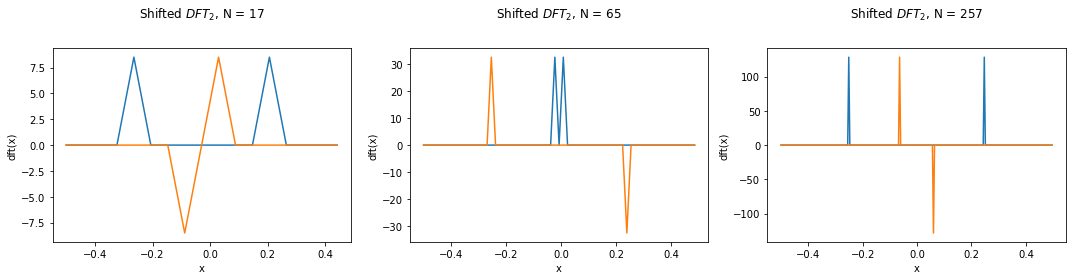

In [24]:
N = np.array([17, 65, 257])

plt.figure(figsize = (15, 4))

for i in range(1, 4):
    plt.subplot(1, 3, i)
    # Plotting real and imaginary parts in the same plot in different colors:
    plt.plot(transform(f_2, N[i - 1], -0.5)[1], np.fft.fftshift(np.real(DFT(transform(f_2, N[i - 1], -0.5)[0]))), transform(f_2, N[i - 1], -0.5)[1], np.fft.fftshift(np.imag(DFT(transform(f_2, N[i - 1], -0.5)[0]))))
    plt.title(f"Shifted $DFT_{2}$, N = {N[i - 1]}", pad = 30)
    plt.xlabel('x')
    plt.ylabel('dft(x)')
    

plt.tight_layout()
    
plt.show()

We can clearly see that the approximation gets better by greater $N$.

- Stating $a_k(f_2)$ and $b_k(f_2)$ without solving an integral: If we compare $f_2(x)$ with the Fourier series, we see that $a_0 = 0$, $a_{64} = 1$, $a_{k \neq 64} = 0$ for $k = 0, 1, ..., n$ and $b_{16} = 1$, $b_{k \neq 16} = 0$ for $k = 1, 2, ..., n$.

- Computing $c_k(f)$ (again without computing the integral): We have that $c_k = \frac{a_k - \text{i}b_k}{2}, k = 1, ...$. So $c_{k \neq 16, 64, -16, -64} = 0$, $c_{16} = \frac{a_{16} - \text{i}b_{16}}{2} = -\frac{\text{i}}{2}$, $c_{-16} = \frac{\text{i}}{2}$, and $c_{64} = \frac{a_{64} - \text{i}b_{64}}{2} = \frac{1}{2} = c_{-64}$.

- The $\text{fftshift}$-function shifts the vector and the DFT to the center of the plot. 

- Using the coefficients to "remove" the second summand of $f_2$ by just modifying $\hat{\vec{f}} \in \mathbb{C}^{257}$: The second summand is the $\text{cos}$-function. To remove this we say that $a_{64} = 0$.

- For the case $N = 17$, i.e.$\hat{\vec{f}} \in \mathbb{C}^{17}$, we can not do this. The approximation is not that good in this case, so we can´t remove coefficients without losing information. 

## Task 2: Signal Processing

### a)

We have that $\vec{c} = \vec{a} * \vec{b}$ where $\vec{a} = (a_0, ..., a_{N - 1}), \vec{b} = (b_0, ..., b_{N - 1}) \in \mathbb{R}^N$ and 

$$ \vec{c}_j = (\vec{a} * \vec{b})_j = \sum^{N - 1}_{k = 0} a_k b_{j - k\text{mod}N}$$

If we use a shifted version $\vec{b}´ = (b_{N - 1}, b_0, ..., b_{N - 2})$ instead, we have

$$ c_j´ = (\vec{a} * \vec{b}´)_j = \sum^{N - 1}_{k = 0} a_k b´_{j - k\text{mod}N} = \sum^{N - 1}_{k = 0} a_k b_{(j - 1) - k\text{mod}N} = c_{j - 1}$$

So $\vec{c}$ also get shifted.

### b)

Porivng that for $f,g \in L_1(\mathbb{T})$, by using Fubini, we have that for any $k \in \mathbb{Z}$ that

$$ c_k(f * g) = c_k(f)c_k(g)$$

From task 1, we have that

$$ c_k(f) = \int^1_0 f(x) \text{e}^{-2 \pi \text{i} k x} dx $$

We also have that

$$ (f * g)(x) = \int_{\mathbb{T}} f(y) g(x - y) dx = \int^1_0 f(y) g(x - y) dy $$

Then

$$ c_k(f * g) = \int^1_0 (f * g)(x) \text{e}^{-2 \pi \text{i} k x} dx 
= \int^1_0 (\int^1_0 f(y) g(x - y) dy) \text{e}^{-2 \pi \text{i} k x} dx 
= \int^1_0 (\int^1_0 f(y) g(x - y) \text{e}^{-2 \pi \text{i} k x} dy) dx $$

By using Fubini, we can write 

$$ c_k(f * g) = \int^1_0 (\int^1_0 f(y) g(x - y) \text{e}^{-2 \pi \text{i} k x} dx) dy 
= \int^1_0 f(y) \int^1_0 g(x - y) \text{e}^{-2 \pi \text{i} k x} dx dy$$

Substituting with $z = x - y, \text{d}z = \text{d}x$:

$$ = \int^1_0 f(y) \int^1_0 g(z) \text{e}^{-2 \pi \text{i} k (z + y)} dz dy 
= \int^1_0 f(y) \text{e}^{-2 \pi \text{i} k y} \int^1_0 g(z) \text{e}^{-2 \pi \text{i} k z} dz dy = c_k(f) c_k(g) $$

Then $ c_k(f * g) = c_k(f)c_k(g)$, which we wanted to prove. 

### c)

Using sample values of the Dirichlet kernel 

$$ D_n (x) = 1 + 2 \sum^{n}_{l = 1} \text{cos}(2 \pi l x), n \in \mathbb{N} $$

Computing the Fourier coefficients $c_k(D_n)$:

$$ c_k(D_n) = \int^1_0 D_n(x) \text{e}^{-2 \pi \text{i} k x} \text{d}x 
= \int^1_0 (1 + 2 \sum^{n}_{l = 1} \text{cos}(2 \pi l x)) \text{e}^{-2 \pi \text{i} k x} \text{d}x 
= \int^1_0 (\text{e}^{-2 \pi \text{i} k x} + 2 \text{e}^{-2 \pi \text{i} k x} \sum^{n}_{l = 1} \frac{\text{e}^{2 \pi l x} + \text{e}^{-2 \pi \text{i} l x}}{2} \text{d}x $$
$$
= \int^1_0 \text{e}^{-2 \pi \text{i} k x} \text{d}x + \int^1_0 \sum^{n}_{l = 1} (\text{e}^{2 \pi x (l - k)} + \text{e}^{-2 \pi \text{i} x (l + k)}) \text{d}x $$

For $|k| \leq n$:

$$\int^1_0 \text{e}^{-2 \pi \text{i} k x} \text{d}x = 
\begin{cases} 
1, & k = 0 \\
0, & \text{else} 
\end{cases}$$

and

$$ \int^1_0 \sum^{n}_{l = 1} (\text{e}^{2 \pi x (l - k)} + \text{e}^{-2 \pi \text{i} x (l + k)}) \text{d}x =
\begin{cases} 
\int^1_0 \sum^{n}_{l = 1} (1 + \text{e}^{-4 \pi \text{i} x k}) \text{d}x, & k = l \\
\int^1_0 \sum^{n}_{l = 1} (0 + 0) \text{d}x, & \text{else}
\end{cases} =
\begin{cases} 
1, & k = l \\
0, & \text{else}
\end{cases}
$$

Then $c_k(D_n) = 1$ for every $|k| \leq n$.

For $|k| > n$:

$$\int^1_0 \text{e}^{-2 \pi \text{i} k x} \text{d}x = 0$$

and

$$ \int^1_0 \sum^{n}_{l = 1} (\text{e}^{2 \pi x (l - k)} + \text{e}^{-2 \pi \text{i} x (l + k)}) \text{d}x = 0$$

Then $c_k(D_n) = 0$ for every $|k| > n$.

### d)

Sampling $f_2(x) = \text{sin}(32 \pi x) + \text{cos}(128 \pi x)$ with $N = 512$ samples. Using this result to convolve this samples signal with Dirichlet kernel $D_n$, $n = 48$, by sampling this one as well:


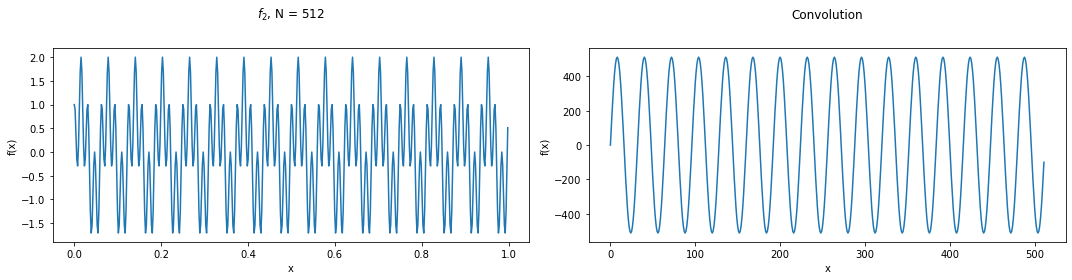

In [25]:
def D_n(x, n):
    """
    Dirichlet kernel.
    
    Input:
    x - the x values
    n - the n in D_n
    
    Output:
    D_vec + 1 - D_n
    """
    D_vec = np.zeros_like(x)
    for l in range(1, n + 1):
        D_vec += 2*np.cos(2*np.pi*l*x)
        
    return D_vec + 1

dft_2 = DFT(transform(f_2, 512, 0)[0])
dft_D = DFT(D_n(transform(f_2, 512, 0)[1], 48))

# Using the results to convolve this samples signal with the Dirichlet kernel D_{n = 48} by sampling this one as well

convolve = scipy.fft.ifft(dft_2 * dft_D)

plt.figure(figsize = (15, 4))


plt.subplot(1, 2, 1)
plt.plot(transform(f_2, 512, 0)[1], transform(f_2, 512, 0)[0])
plt.title(f"$f_2$, N = 512", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(np.real(convolve))
plt.title(f"Convolution", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.tight_layout()
    
plt.show()


After the convolution the signal is the $\text{sin}$-function in $f_2(x)$. This happens because we know from task $1$i) that $a_{k \neq 64} = 0$, so when $n = 48$ the $\text{cos}$-function disappears. 

### e)

Convolving the signal from $\text{project1-1e-data.csv}$ with two kernels: 

The Dirichlet kernel (it´s sampled/discretized variant) $D_{92}$ and the kernel (signal to convolve with) $\vec{h} = (−1, 2 − 1, 0, . . . , 0)^T \in \mathbb{R}^N$, where $N$ is the length of the signal from the file.

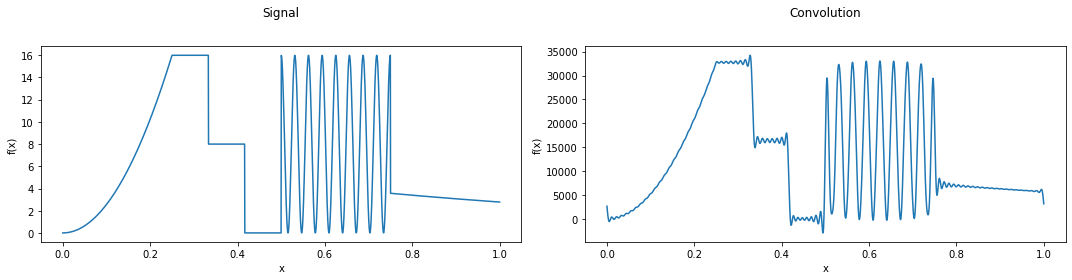

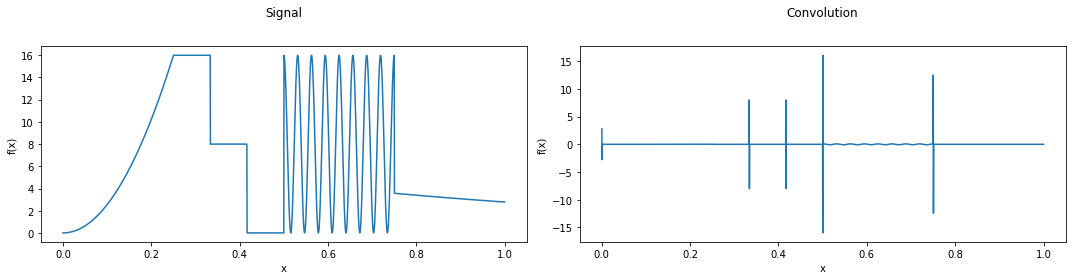

In [26]:
data = pd.read_csv("project1-1e-data.csv")

x = data["x"].to_numpy()
signal = data["signal"].to_numpy()

dft_proj = DFT(signal)
dft_D = DFT(D_n(transform(f_2, len(x), 0)[1], 92))

convolve_D = scipy.fft.ifft(dft_proj * dft_D)

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, signal)
plt.title(f"Signal", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, np.real(convolve_D))
plt.title(f"Convolution", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.tight_layout()
    
plt.show()

def h(N):
    """
    The kernel h.
    
    Input:
    N - the number of elements in h
    
    Output:
    np.pad(h_vec, (0, N - 3)) - the kernel h
    """
    h_vec = np.array([-1, 2, -1])
    return np.pad(h_vec, (0, N - 3))
    
dft_h = DFT(h(len(signal)))

convolve_h = scipy.fft.ifft(dft_proj * dft_h)

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.plot(x, signal)
plt.title(f"Signal", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, np.real(convolve_h))
plt.title(f"Convolution", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.tight_layout()
    
plt.show()

We see that the Dirichlet kernel makes the signal continuous and smooths it out. The $\vec{h}$ however shows the drastically jumps in the signal, in other words the most important changes. When the signal swings up and down from $x = [0.5, 0.7]$, this does not count as an important change. This would for example in a grayscale image just be gray, swinging between black and white.

### f)

To get a filter that does "the opposite of Dirichlet":

$$c_k(D_n) = 0, if |k| \leq n $$

and

$$ c_k(D_n) = 1, |k| \geq n $$

### g)

We know a certain set of frequencies for the (not yet sampled function) $c_k(f)$, $40 \leq |k| \leq 64$ of interest. To "design" a filter to only have these left in our signal, we need to convolve with $D_{64}$ and "the opposite of $D_{40}$".



## Task 3: Image Processing

### a)

We have the multivariate Fourier transform as

$$ \hat{F}_{k_1, k_2} 
:= \sum^{N_1 - 1}_{j_1 = 0} \sum^{N_2 - 1}_{j_2 = 0} F_{j_1, j_2} \text{e}^{-2 \pi \text{i}(\frac{j_1 k_1}{N_1} + \frac{j_2 k_2}{N_2})}, k_1 = 0, ..., N_1 - 1, k_2 = 0, ..., N_2 - 1, $$

where $F = (f(x_{j_1, j_2}))^{N_1 - 1, N_2 - 1}_{j_1, j_2 = 0} \in \mathbb{R}^{N_1 \times N_2}$ is a sampled image for the sampling points $x_{j_1, j_2} = (\frac{j_1}{N_1}, \frac{j_2}{N_2}), j_i = 0, ..., N_i - 1, i = 1, 2$.

Using $1\text{D}$ Fourier transforms to prove that this equation can be computed in the same fast way, namely in $\mathcal{O}(N_1 N_2 \log{}(N_1 N_2))$: 

$1\text{D}$ Fourier transforms can be computed in $\mathcal{O}(N \log{}(N))$. A $2 \text{D}$ Fourier transform with a sampled image $F \in \mathbb{R}^{N_1 \times N_2}$ can be computed in 

$$ N_2 N_1 \log{}(N_1) + N_1 N_2 \log{}(N_2) = N_1 N_2 (\log{}(N_1) + \log{}(N_2)) = N_1 N_2 \log{}(N_1 N_2)$$

It takes the $1 \text{D}$ Fourier transform in each row, $N_2 N_1 \log{}(N_1)$,  and coloumn, $N_1 N_2 \log{}(N_2)$. Thus the equation can be computed in $\mathcal{O}(N_1 N_2 \log{}(N_1 N_2))$.


### b) 

Considering the function

$$ f(\vec{x}) = 1 + \frac{1}{2} \text{sin}(2 \pi \vec{x}^T \vec{k}), \vec{x} \in [0, 1]^2$$

for the three cases $ \vec{k} \in \{ (5, 0)^T, (0, 10)^T, (8, 8)^T\} $. Plotting these as images $F$ and their amplitudes $|\hat{F}|$:

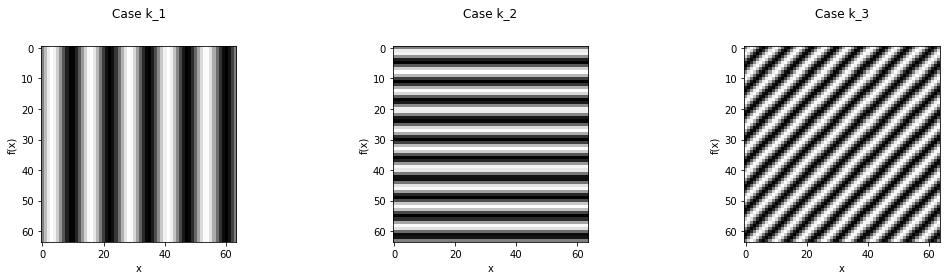

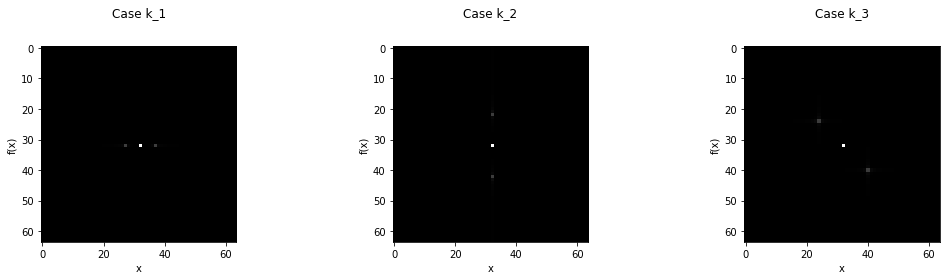

In [27]:
# Plotting these (as images) F:

N_1 = 64
N_2 = 64

def f(x, y, k):
    """
    The function f(x).
    
    Input:
    x - the x vectors
    k - k vectors
    
    Output:
    1 + 0.5*np.sin(2*pi*np.transpose(x)*np.transpose(k)) - f(x)
    
    """
    return 1 + 0.5*np.sin(2*np.pi*(x*k[0] + y*k[1]))

# The three cases:
k_1 = np.array([5, 0])
k_2 = np.array([0, 10])
k_3 = np.array([8, 8])

# The x vector:
x_1 = np.linspace(0, 1, N_1)
x_2 = np.linspace(0, 1, N_1)
x_m, y_m = np.meshgrid(x_1, x_2)

# The function values for each case:
f_1 = f(x_m, y_m, k_1)
f_2 = f(x_m, y_m, k_2)
f_3 = f(x_m, y_m, k_3)
    
plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
plt.imshow(f_1, cmap = "gray")
plt.title(f"Case k_1", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 3, 2)
plt.imshow(f_2, cmap = "gray")
plt.title(f"Case k_2", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 3, 3)
plt.imshow(f_3, cmap = "gray")
plt.title(f"Case k_3", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.tight_layout()
    
plt.show()
    
# Plotting their amplitude (the absolute value of the discrete Fourier transform):
f_1 = scipy.fft.fft2(f_1)
f_1 = scipy.fft.fftshift(f_1)

f_2 = scipy.fft.fft2(f_2)
f_2 = scipy.fft.fftshift(f_2)

f_3 = scipy.fft.fft2(f_3)
f_3 = scipy.fft.fftshift(f_3)

plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
plt.imshow(abs(f_1), cmap = "gray")
plt.title(f"Case k_1", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 3, 2)
plt.imshow(abs(f_2), cmap = "gray")
plt.title(f"Case k_2", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 3, 3)
plt.imshow(abs(f_3), cmap = "gray")
plt.title(f"Case k_3", pad = 30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.tight_layout()
    
plt.show()

Each case correspond good to a $\text{sin}$-function. Their amplitudes also correspond good to how the $\text{sin}$-waves are oriented.

### c)

Loading the image $\text{barbara.gif}$. Using the three filters given in the task and the Dirichlet kernel $D_{64}$ to do a $2D$ variant of the convolution:

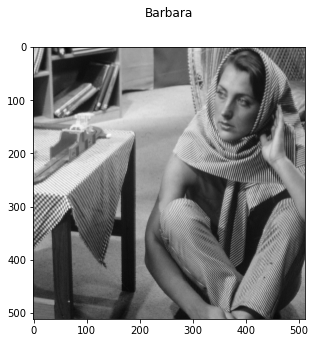

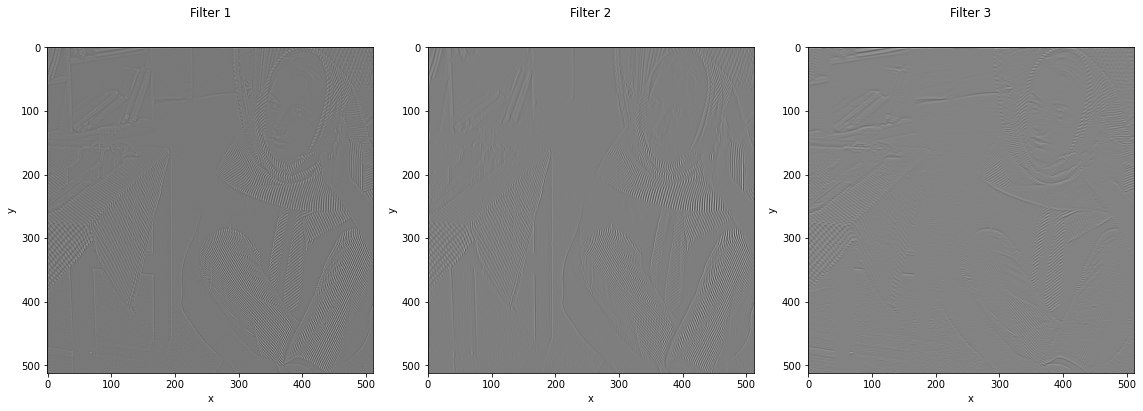

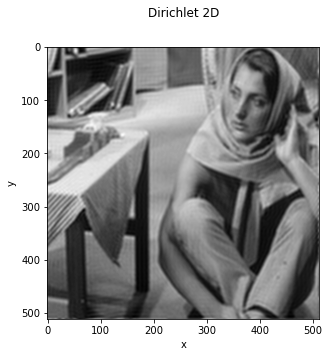

In [28]:
# Adapting the filters from Task 2e) to the 2D case, by defining for example filters like D_N(x) = D_N_1(x_1)D_N_2(x_2)

# Using the filters and the 2D Fourier transform to do a 2D variant of the convolution:

barbara = Image.open('barbara.gif')
barbara_array = np.array(barbara)

filter_barbara = np.zeros((len(barbara_array), len(barbara_array)))

filter_1 = filter_barbara.copy()
filter_2 = filter_barbara.copy()
filter_3 = filter_barbara.copy()

filter_1[0, 0:3] = [0, -1, 0]
filter_1[1, 0:3] = [-1, 4, -1]
filter_1[2, 0:3] = [0, -1, 0]

filter_2[0, 0:3] = [-1, 2, -1]
filter_2[1, 0:3] = [-1, 2, -1]
filter_2[2, 0:3] = [-1, 2, -1]

filter_3[0, 0:3] = [-1, -1, -1]
filter_3[1, 0:3] = [2, 2, 2]
filter_3[2, 0:3] = [-1, -1, -1]

m, n = np.shape(barbara)
x_n = np.linspace(0, 1, n)
x_m = np.linspace(0, 1, m)
x, y = np.meshgrid(x_n, x_m)

D_2d = D_n(x, N_1)*D_n(y, N_2)

dft_barbara = scipy.fft.fft2(barbara)
dft_1 = scipy.fft.fft2(filter_1)
dft_2 = scipy.fft.fft2(filter_2)
dft_3 = scipy.fft.fft2(filter_3)
dft_D = scipy.fft.fft2(D_2d)

convolve_1 = scipy.fft.ifft2(dft_barbara * dft_1)
convolve_2 = scipy.fft.ifft2(dft_barbara * dft_2)
convolve_3 = scipy.fft.ifft2(dft_barbara * dft_3)
convolve_D = scipy.fft.ifft2(dft_barbara * dft_D)

plt.figure(figsize = (16, 5))

plt.imshow(barbara, cmap = "gray")
plt.title(f"Barbara", pad = 30)

plt.show()

plt.figure(figsize = (16, 6))

plt.subplot(1, 3, 1)
plt.imshow(np.real(convolve_1), cmap = "gray")
plt.title(f"Filter 1", pad = 30)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.imshow(np.real(convolve_2), cmap = "gray")
plt.title(f"Filter 2", pad = 30)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.imshow(np.real(convolve_3), cmap = "gray")
plt.title(f"Filter 3", pad = 30)
plt.xlabel('x')
plt.ylabel('y')
    
plt.tight_layout()
    
plt.show()

plt.figure(figsize = (16, 5))

plt.imshow(np.real(convolve_D), cmap = "gray")
plt.title(f"Dirichlet 2D", pad = 30)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

We can observe that the three filters have different characteristics. Filter $1$ gives a relatively good representation of the image. Filter $2$ and $3$, respectively, gives a relatively good representation of the vertical and horisontal lines. This makes sense when we look at their matrices. The filters have somewhat the same effect as the $\vec{h}$-kernel, that is that they show drastically colour changes. Dirichlet kernel, however, smooths out the image as we already knew from task $2$e).

### d)

Computing and plotting the images $\text{Yarimton.png}$´s, $\text{Lighthouse.png}$´s, and $\text{Munkholmen.png}$´s logarithm of the amplitude and after removing the dot artefacts:

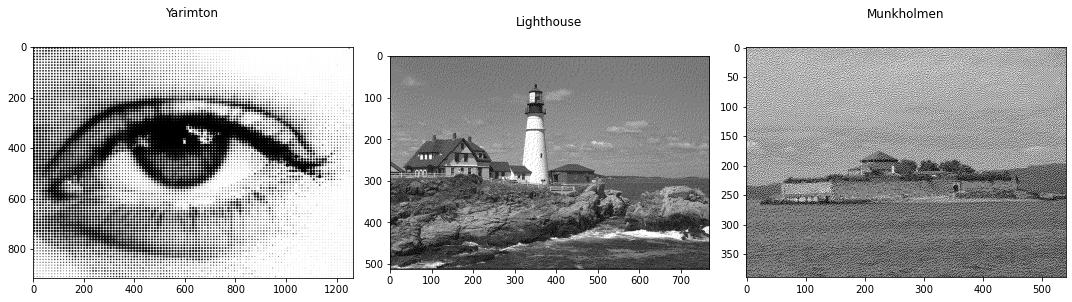

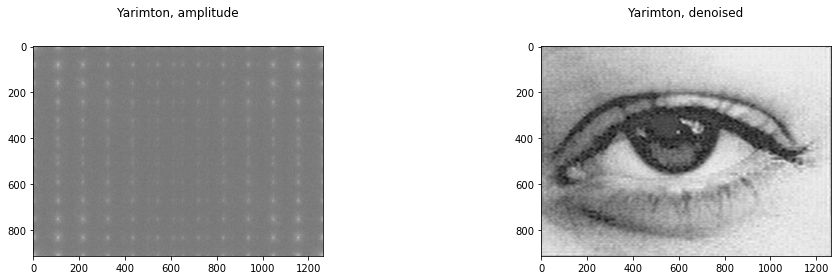

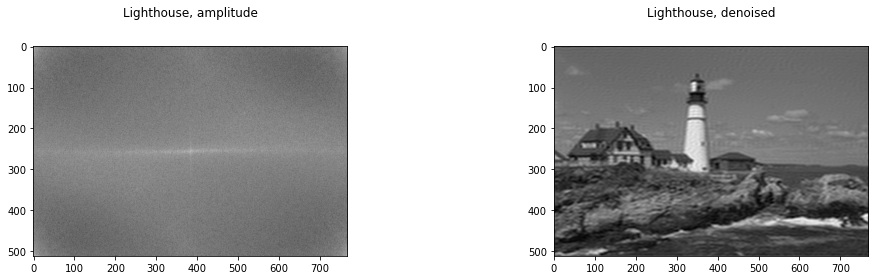

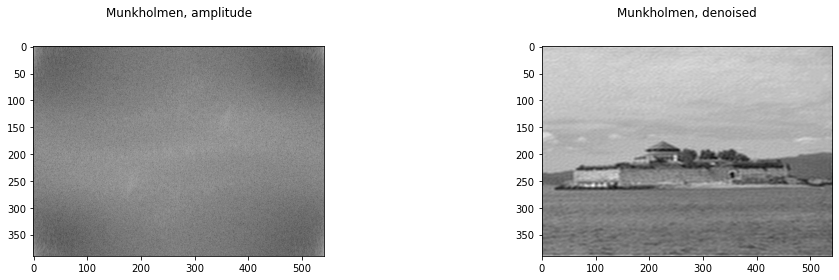

In [29]:
yarimton = Image.open('Yarimton-dithered.png')
yarimton_array = np.array(yarimton)

lighthouse = Image.open('lighthouse-dithered.png')
lighthouse_array = np.array(lighthouse)

munkholmen = Image.open('munkholmen-dithered.png')
munkholmen_array = np.array(munkholmen)

fft_yarimton = scipy.fft.fft2(yarimton)
m, n = np.shape(yarimton)
x_n = np.linspace(0, 1, n)
x_m = np.linspace(0, 1, m)
x, y = np.meshgrid(x_n, x_m)

D_2d = D_n(x, N_1)*D_n(y, N_2)
dft_D = scipy.fft.fft2(D_2d)
conv_yarimton = scipy.fft.ifft2(fft_yarimton * dft_D*(-1))

fft_lighthouse = scipy.fft.fft2(lighthouse)
m, n = np.shape(lighthouse)
x_n = np.linspace(0, 1, n)
x_m = np.linspace(0, 1, m)
x, y = np.meshgrid(x_n, x_m)

D_2d = D_n(x, N_1)*D_n(y, N_2)
dft_D = scipy.fft.fft2(D_2d)
conv_lighthouse = scipy.fft.ifft2(fft_lighthouse * dft_D)

fft_munkholmen = scipy.fft.fft2(munkholmen)
m, n = np.shape(munkholmen)
x_n = np.linspace(0, 1, n)
x_m = np.linspace(0, 1, m)
x, y = np.meshgrid(x_n, x_m)

D_2d = D_n(x, N_1)*D_n(y, N_2)
dft_D = scipy.fft.fft2(D_2d)
conv_munkholmen = scipy.fft.ifft2(fft_munkholmen * dft_D)

plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
plt.imshow(yarimton, cmap = "gray")
plt.title(f"Yarimton", pad = 30)

plt.subplot(1, 3, 2)
plt.imshow(lighthouse, cmap = "gray")
plt.title(f"Lighthouse", pad = 30)

plt.subplot(1, 3, 3)
plt.imshow(munkholmen, cmap = "gray")
plt.title(f"Munkholmen", pad = 30)
    
plt.tight_layout()
    
plt.show()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.imshow(abs(fft_yarimton), norm=LogNorm(), cmap = "gray")
plt.title(f"Yarimton, amplitude", pad = 30)

plt.subplot(1, 2, 2)
plt.imshow(np.real(conv_yarimton), cmap = "gray")
plt.title(f"Yarimton, denoised", pad = 30)
    
plt.tight_layout()
    
plt.show()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.imshow(abs(fft_lighthouse), norm=LogNorm(), cmap = "gray")
plt.title(f"Lighthouse, amplitude", pad = 30)

plt.subplot(1, 2, 2)
plt.imshow(np.real(conv_lighthouse), cmap = "gray")
plt.title(f"Lighthouse, denoised", pad = 30)
    
plt.tight_layout()
    
plt.show()

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.imshow(abs(fft_munkholmen), norm=LogNorm(), cmap = "gray")
plt.title(f"Munkholmen, amplitude", pad = 30)

plt.subplot(1, 2, 2)
plt.imshow(np.real(conv_munkholmen), cmap = "gray")
plt.title(f"Munkholmen, denoised", pad = 30)
    
plt.tight_layout()
    
plt.show()

Their amplitudes correspond good to where there is white in the image. Taking the convolution with the Dirichlet kernel, as before, smooths out the image and removes the dot artefacts. 